<a href="https://colab.research.google.com/github/danielarruda1000/geo_visao_comp/blob/main/Projeto_1_GEO_VISAO_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1
* A) Utilize o produto vetorial para calcular o ponto de fuga da parte frontal do prédio onde aparece FIRE STATION

* B) Determine uma homografia H (sem usar findHomografy) que aplica o ponto de fuga calculado em retas paralelas com a direção X, e que mantém a direção do eixo Y inalterada. Utilize a função WarpPerspective para deformar a imagem aplicando H.
* Dica calcule a homografia inversa e depois inverta a matriz

## A) Ponto de fuga

In [ ]:
from IPython.display import Image

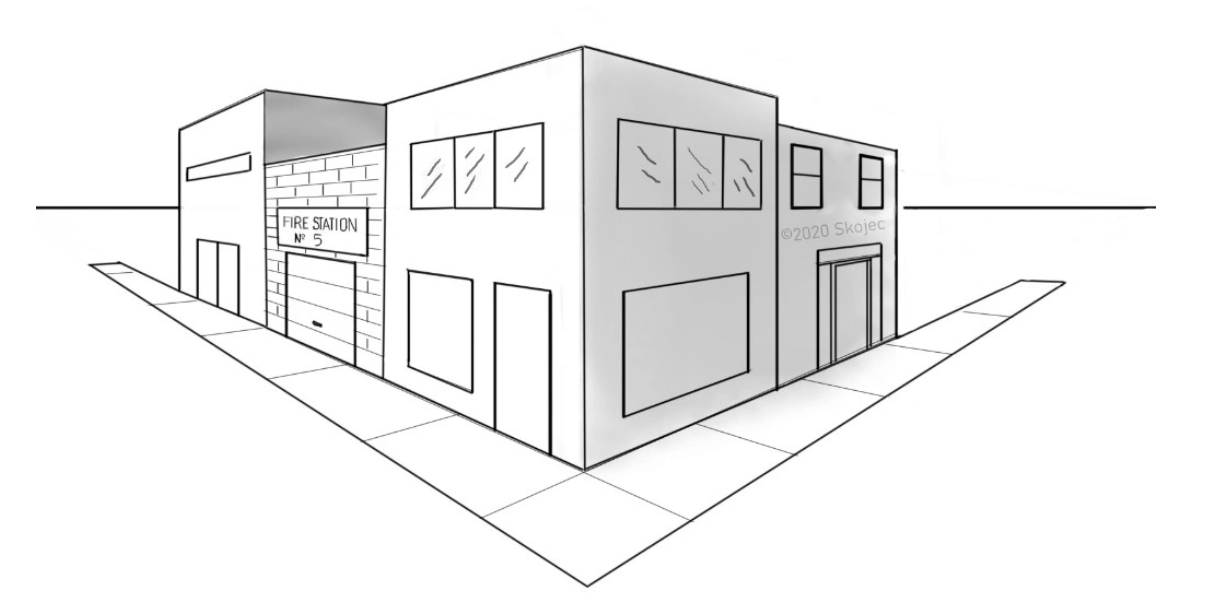

In [ ]:
Image('1.PNG')

In [ ]:
import cv2
import numpy as np

In [ ]:
def reta_intesercao_cv(p1, p2):

  if type(p1) != tuple:
    p1 = (p1[0], p1[1], p1[2])
  if type(p2) != tuple:
    p2 = (p2[0], p2[1], p2[2])


  a1, a2, a3 = np.array(p1[0]), np.array(p1[1]), np.array(p1[2])
  b1, b2, b3 = np.array(p2[0]), np.array(p2[1]), np.array(p2[2])

  x = cv2.subtract(cv2.multiply(a2, b3), cv2.multiply(a3,b2))
  y = cv2.subtract(cv2.multiply(a3,b1), cv2.multiply(a1, b3))
  z = cv2.subtract(cv2.multiply(a1, b2), cv2.multiply(a2,b1))

  reta = np.array([x,y,z]).reshape(1,3)[0]

  return reta

In [ ]:
def ponto_intesercao_cv(r1, r2):

  reta = reta_intesercao_cv(r1,r2)

  a = float(reta[0])
  b = float(reta[1])
  c = float(reta[2])
  print(a,b,c)

  ponto_a = cv2.divide(a, c)[0][0]
  ponto_b = cv2.divide(b, c)[0][0]

  return round(ponto_a,1), round(ponto_b,1)

In [ ]:
# Pontos da faixada

# Superior
a = (278, 208, 1)
b = (367, 207, 1)
reta_ab = reta_intesercao_cv(a,b)
print('Reta A-B', reta_ab)

a
# Inferior
c = (278, 244, 1)
d = (367, 256, 1)
reta_cd = reta_intesercao_cv(c,d)
print('Reta C-D', reta_cd)

ponto_de_fuga = ponto_intesercao_cv(reta_ab, reta_cd)
print('Ponto de fuga:', 'X=', ponto_de_fuga[0], 'Y=', ponto_de_fuga[1])

Reta A-B [     1     89 -18790]
Reta C-D [   -12     89 -18380]
36490.0 243860.0 1157.0
Ponto de fuga: X= 31.5 Y= 210.8


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
ponto_de_fuga

(np.float64(31.5), np.float64(210.8))

# B) Achar uma homografia

Homografia H:
 [[3.        0.        0.       ]
 [0.        3.        0.       ]
 [0.0031746 0.        1.       ]]


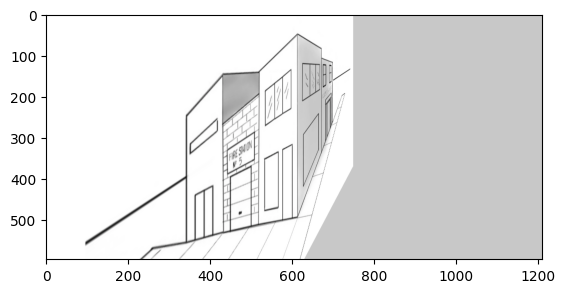

In [ ]:
import numpy as np
import cv2

p1  = -0.1 / ponto_de_fuga[0]

H_inv = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [p1, 0, 1]
])

H_inv = np.linalg.inv(H_inv)

a = 3
b = 3

S = np.array([
    [a, 0, 0],
    [0, b, 0],
    [0, 0, 1]
], dtype=float)

H_final = S @ H_inv


print("Homografia H:\n", H_final)

img = cv2.imread("1.PNG")
h, w = img.shape[:2]

warped = cv2.warpPerspective(
    img, H_final, (w, h),
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(200, 200, 200)
)

img_original_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.imshow(img_original_rgb)

# Questão 2
* Utilzize o conhecimento do poscionamento das marcações de um campo de futebol para acahar uma homografia H, a partir do uso da função findHomography, que mapeia o campo para a vista superior. Use o warpPerspective para aplicar h

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
img_path = '2.PNG'
img_original = cv2.imread(img_path)

img_campo = cv2.imread('campo.jpg')

(np.float64(-0.5), np.float64(611.5), np.float64(444.5), np.float64(-0.5))

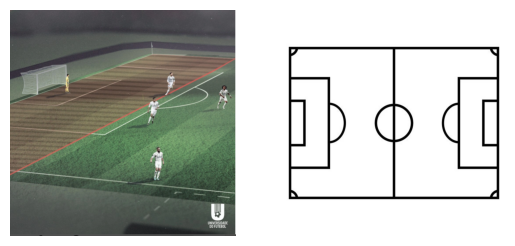

In [ ]:
plt.subplot(121)
plt.imshow(img_original_rgb)
plt.axis('off')

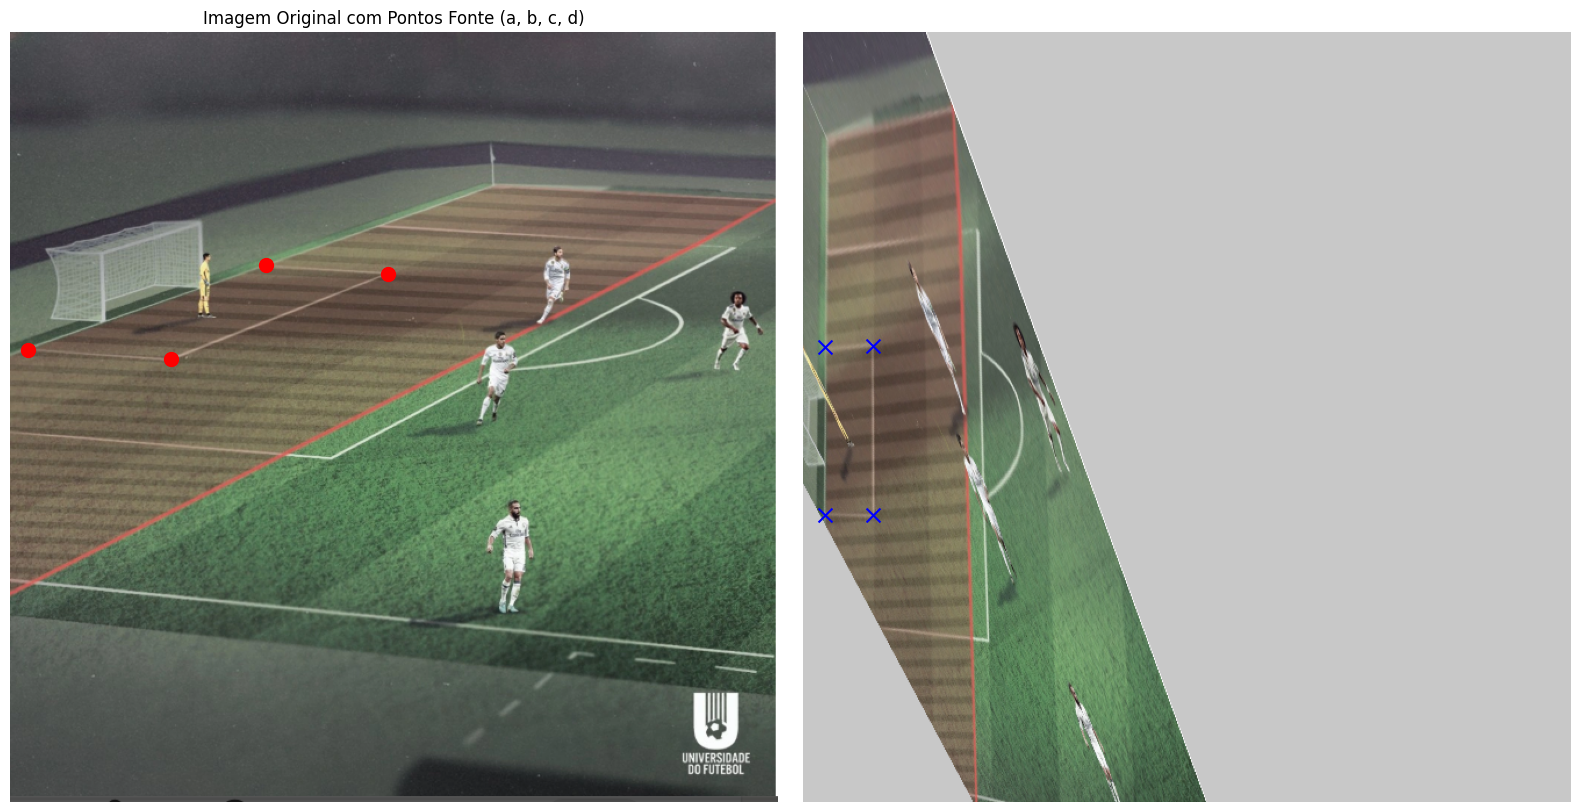

In [ ]:
pts_src = np.array([
    [220, 200],  # Ponto a
    [325, 208],  # Ponto b
    [138, 281],  # Ponto c
    [15, 273]   # Ponto d
], dtype=np.float32)

pts_dst = np.array([
    [19, 271],  # Superior Esquerdo
    [60, 270],  # Superior Direito
    [60, 415],  # Inferior Esquerdo
    [19, 415]   # Inferior Direito
], dtype=np.float32)


H, _ = cv2.findHomography(pts_src, pts_dst, cv2.RANSAC, 5.0)
h, w = img_original.shape[:2]
new_w = w
new_h = h


img_retificada = cv2.warpPerspective(img_original, H, (new_w, new_h),
                                      borderMode=cv2.BORDER_CONSTANT,
                                      borderValue=(200, 200, 200)) # Preencher com cinza


img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_retificada_rgb = cv2.cvtColor(img_retificada, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(img_original_rgb)
plt.scatter(pts_src[:, 0], pts_src[:, 1], color='red', marker='o', s=100)
plt.title('Imagem Original com Pontos Fonte (a, b, c, d)')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_retificada_rgb)
plt.scatter(pts_dst[:, 0], pts_dst[:, 1], color='blue', marker='x', s=100)
plt.axis('off')

plt.tight_layout()
plt.show()